In [211]:
#list all the files in the directory
import os
import re
# port = 'VISAKHA'
# port_data_path = r'C:\Users\HP\Documents\GitHub\Tidal_Project\Datasets\VISAG MSL DATA 1953_2023'

port = 'MUMBAI'
port_data_path = r'C:\Users\HP\Documents\GitHub\Tidal_Project\Datasets\MUMBAI MSL DATA 1921_2023'

output_path = r'C:\Users\HP\Documents\GitHub\Tidal_Project\Output'
dir_list = os.listdir(port_data_path)
# print(dir_list)

filtered_files1 = [file for file in dir_list if re.match(r'MUMBAI\.H\d{4}$', file)]
filtered_files2 = [file for file in dir_list if re.match(r'MUMBAI\d{4}$', file)]
filtered_files = filtered_files1 + filtered_files2
print(filtered_files)

['MUMBAI.H2006', 'MUMBAI.H2007', 'MUMBAI.H2008', 'MUMBAI.H2009', 'MUMBAI.H2010', 'MUMBAI.H2011', 'MUMBAI.H2015', 'MUMBAI.H2016', 'MUMBAI.H2017', 'MUMBAI.H2018', 'MUMBAI.H2020', 'MUMBAI.H2021', 'MUMBAI.H2022', 'MUMBAI1921', 'MUMBAI1922', 'MUMBAI1923', 'MUMBAI1924', 'MUMBAI1925', 'MUMBAI1926', 'MUMBAI1927', 'MUMBAI1928', 'MUMBAI1929', 'MUMBAI1930', 'MUMBAI1931', 'MUMBAI1932', 'MUMBAI1933', 'MUMBAI1934', 'MUMBAI1935', 'MUMBAI1936', 'MUMBAI1937', 'MUMBAI1938', 'MUMBAI1939', 'MUMBAI1940', 'MUMBAI1941', 'MUMBAI1942', 'MUMBAI1943', 'MUMBAI1944', 'MUMBAI1945', 'MUMBAI1946', 'MUMBAI1947', 'MUMBAI1948', 'MUMBAI1949', 'MUMBAI1950', 'MUMBAI1951', 'MUMBAI1952', 'MUMBAI1953', 'MUMBAI1954', 'MUMBAI1955', 'MUMBAI1956', 'MUMBAI1957', 'MUMBAI1958', 'MUMBAI1959', 'MUMBAI1960', 'MUMBAI1961', 'MUMBAI1962', 'MUMBAI1963', 'MUMBAI1964', 'MUMBAI1965', 'MUMBAI1966', 'MUMBAI1967', 'MUMBAI1968', 'MUMBAI1969', 'MUMBAI1970', 'MUMBAI1971', 'MUMBAI1972', 'MUMBAI1973', 'MUMBAI1974', 'MUMBAI1975', 'MUMBAI1976', 'MUMBAI

In [213]:
from collections import OrderedDict

filtered_file_paths = {
    year: fr"{port_data_path}\{file}"
    for file in filtered_files
    if (year := int(file[-4:]))
}

filtered_file_paths = OrderedDict(sorted(filtered_file_paths.items()))

print(filtered_file_paths)


OrderedDict({1921: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1921', 1922: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1922', 1923: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1923', 1924: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1924', 1925: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1925', 1926: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1926', 1927: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1927', 1928: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1928', 1929: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\MUMBAI MSL DATA 1921_2023\\MUMBAI1929', 1930: 'C:\\Users\\HP\\Documents\\

In [215]:
import os
import re
import pandas as pd
import calendar
from datetime import datetime, timedelta

def parse_wave_heights(file_path, yearnum):
    """
    Parses the wave height file for the given year.
    
    If the file exists, it reads the file and assigns sequential dates (starting January 1).
    If the file does not exist, it creates rows for each day of the year (accounting for leap years)
    with all hourly values set to None.
    
    Each row contains a date string and 24 hourly wave height values.
    """
    data = []
    
    # Start date is January 1 of the given year.
    start_date = datetime(yearnum, 1, 1)
    
    # If file doesn't exist, populate data for each day of the year with None.
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist. Populating data for {yearnum} with no values.")
        total_days = 366 if calendar.isleap(yearnum) else 365
        for i in range(total_days):
            current_date = start_date + timedelta(days=i)
            row = [current_date.strftime('%Y-%m-%d')] + [None] * 24
            data.append(row)
        return data
    
    # If the file exists, open and process it.
    if file_path[-5] == 'H':
        with open(file_path, 'r') as file:
            lines = file.readlines()
        
        data_started = False
        current_date = start_date
        for line in lines:
            # Look for the marker that indicates the data rows have started.
            if 'DAYS' in line:
                data_started = True
                continue
            # Process only lines after the header that don't start with a separator.
            if data_started and not line.startswith('-'):
                # Preprocess the line: add a space before a minus sign that immediately follows a digit.
                line = re.sub(r'(\d)-', r'\1 -', line)
                parts = line.split()
                if parts:
                    day = parts[0]
                    # Only process if the day is a digit.
                    if day.isdigit():
                        # If for some reason we read more rows than there are days in the year, break out.
                        if current_date.year != yearnum:
                            break
                        # Process the 24 hourly values.
                        heights = []
                        for i in range(1, 25):
                            if i < len(parts):
                                try:
                                    height = float(parts[i])
                                except ValueError:
                                    height = None
                            else:
                                height = None
                            heights.append(height)
                        data.append([current_date.strftime('%Y-%m-%d')] + heights)
                        current_date += timedelta(days=1)
    else:
        with open(file_path, 'r') as file:
            lines = file.readlines()
                 # Skip metadata lines
            lines = lines[3:]  # Assuming first three lines are metadata
            
            current_date = start_date
            for line in lines:
                line = line.strip()
                
                if len(line) >= 72:  # Ensuring we have at least 24 values (each 3 digits)
                    heights = [int(line[i:i+3])/100 for i in range(0, 72, 3)]  # Extract 3-digit groups
                    data.append([current_date.strftime('%Y-%m-%d')] + heights)
                    current_date += timedelta(days=1)
                
                elif line == 900: # No data recorded for the day
                    heights = [None] * 24 
                    data.append([current_date.strftime('%Y-%m-%d')] + heights)
                    current_date += timedelta(days=1)
        
    return data

def data_to_excel(all_data, output_file):
    """
    Converts the combined list of rows into a pandas DataFrame and writes it to an Excel file.
    The first column is 'Date' and the next 24 columns are H1, H2, ..., H24.
    """
    columns = ['Date'] + [f'H{i}' for i in range(1, 25)]
    df = pd.DataFrame(all_data, columns=columns)
    
    # Write DataFrame to Excel. This will overwrite any existing file.
    df.to_excel(output_file, index=False)
    print(f"Data successfully exported to {output_file}")

# ---------------
# Main Execution
# ---------------

# This list will hold data for all years.
all_data = []

# Process each year specified in the dictionary.
for year, file_path in filtered_file_paths.items():
    print(f"Processing year {year} ...")
    year_data = parse_wave_heights(file_path, year)
    all_data.extend(year_data)

# Specify the output Excel file name.
output_excel_path = fr'{output_path}\Appended_Wave_Heights_of_{port}.xlsx'
data_to_excel(all_data, output_excel_path)


Processing year 1921 ...
Processing year 1922 ...
Processing year 1923 ...
Processing year 1924 ...
Processing year 1925 ...
Processing year 1926 ...
Processing year 1927 ...
Processing year 1928 ...
Processing year 1929 ...
Processing year 1930 ...
Processing year 1931 ...
Processing year 1932 ...
Processing year 1933 ...
Processing year 1934 ...
Processing year 1935 ...
Processing year 1936 ...
Processing year 1937 ...
Processing year 1938 ...
Processing year 1939 ...
Processing year 1940 ...
Processing year 1941 ...
Processing year 1942 ...
Processing year 1943 ...
Processing year 1944 ...
Processing year 1945 ...
Processing year 1946 ...
Processing year 1947 ...
Processing year 1948 ...
Processing year 1949 ...
Processing year 1950 ...
Processing year 1951 ...
Processing year 1952 ...
Processing year 1953 ...
Processing year 1954 ...
Processing year 1955 ...
Processing year 1956 ...
Processing year 1957 ...
Processing year 1958 ...
Processing year 1959 ...
Processing year 1960 ...


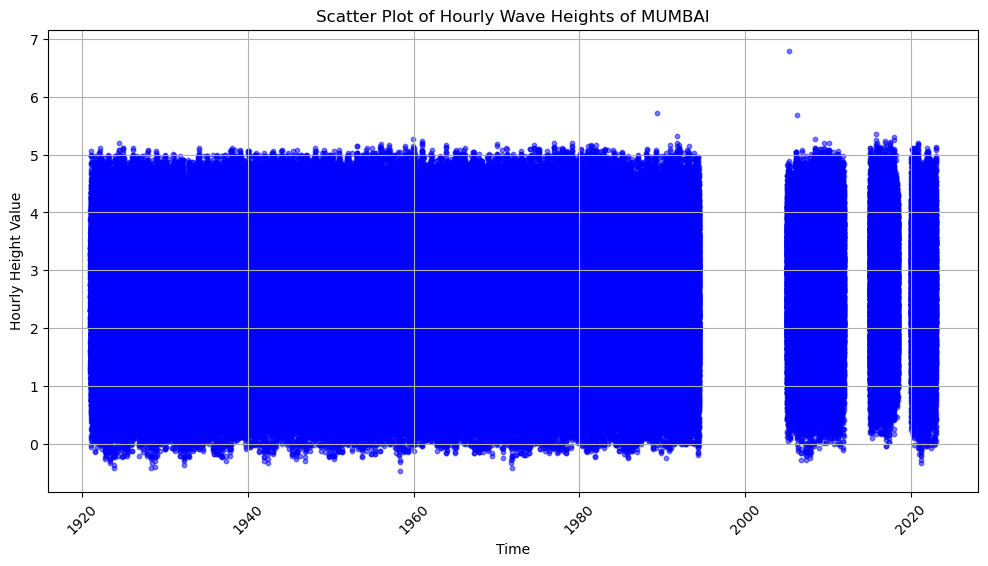

Plot saved as C:\Users\HP\Documents\GitHub\Tidal_Project\Output\wave_heights_plot_of_MUMBAI.jpg


In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed Excel file
file_path = output_excel_path
df = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert wide format (H1, H2, ..., H24) to long format (Time, Height)
df_melted = df.melt(id_vars=['Date'], var_name='Hour', value_name='Height')

# Extract the numeric hour from column names (e.g., 'H1' -> 1, 'H24' -> 24) using slicing
df_melted['Hour'] = df_melted['Hour'].apply(lambda x: int(x[1:]) if x[1:].isdigit() else None)

# Drop any rows where the hour extraction failed
df_melted.dropna(subset=['Hour'], inplace=True)

# Create a proper timestamp column
df_melted['Timestamp'] = df_melted['Date'] + pd.to_timedelta(df_melted['Hour'] - 1, unit='h')

# Drop NaN values (if any) in the height column
df_melted.dropna(subset=['Height'], inplace=True)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_melted['Timestamp'], df_melted['Height'], color='b', alpha=0.5, s=10)  # Adjust alpha & size for visibility
plt.xlabel('Time')
plt.ylabel('Hourly Height Value')
plt.title(f'Scatter Plot of Hourly Wave Heights of {port}')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot as JPEG
jpeg_file = fr'{output_path}\wave_heights_plot_of_{port}.jpg'
plt.savefig(jpeg_file, format='jpeg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved as {jpeg_file}")
